# Problem 1

Upload a selfie below. Try some of the color manipulations we went over in class, or even some more advanced ones from the `skimage` documentation. At a minimum, do the following:

1. Highlight a single color in the image by preserving that one color while setting all other colors to gray.
2. Use the HSI model to modify the hue, saturation, and intensity all separately.

In [1]:
from google.colab import drive
import numpy as np

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv, hsv2rgb
from skimage.util import img_as_float

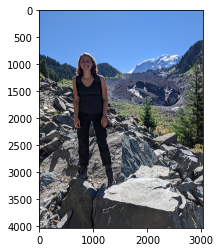

In [16]:
selfie = img_as_float(plt.imread('/content/drive/MyDrive/carbonGlacier.jpg'))
plt.imshow(selfie)

In [19]:
selfie[500,1500,:]

array([0.41568627, 0.62352941, 0.92156863])

(-0.5, 3023.5, 4031.5, -0.5)

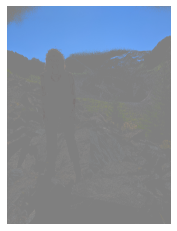

In [34]:
#highlight a single color in the image
c = np.array([0.415686, 0.623529, 0.921569])
WR = 0.005
WG = 0.09
WB = 0.0001
im_slice = np.copy(selfie)
sliced = (np.abs(selfie[:, :, 0] - c[0]) > WR/2) & (np.abs(selfie[:, :, 1] - c[1]) > WG/2) & (np.abs(selfie[:, :, 2] - c[2]) > WB/2)

for i in [0, 1, 2]:
    im_slice[sliced, i] = 0.5

plt.imshow(im_slice)
plt.axis('off')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


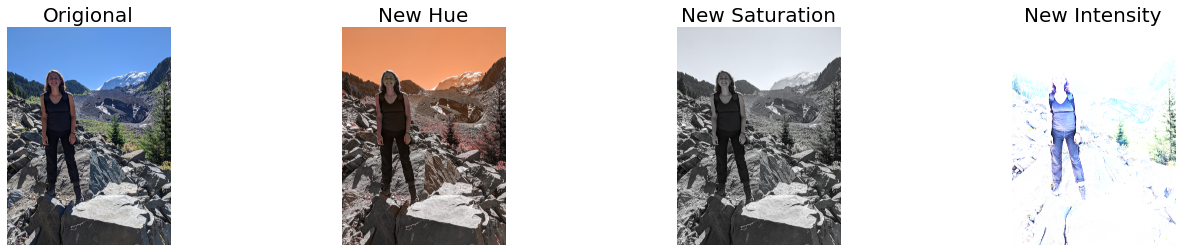

In [5]:
#Use the HSI model to modify the hue, saturation, and intensity all separately
selfie_hsv = rgb2hsv(selfie)

#change hue
selfie_h=np.copy(selfie_hsv)
selfie_h[:,:,0] = selfie_hsv[:,:,0]*0.1
selfie_nh = hsv2rgb(selfie_h)

#change saturation
selfie_s = np.copy(selfie_hsv)
selfie_s[:,:,1] = selfie_hsv[:,:,1]*0.1
selfie_ns = hsv2rgb(selfie_s)
#change intensity
selfie_v=np.copy(selfie_hsv)
selfie_v[:,:,2] = selfie_hsv[:,:,2]*10
selfie_nv = hsv2rgb(selfie_v)

fig, axes = plt.subplots(ncols=4, figsize=(23, 4))
labels = ['Origional','New Hue', 'New Saturation', 'New Intensity']

axes[0].imshow(selfie, vmin=0, vmax =1)
axes[1].imshow(selfie_nh, vmin=0, vmax =1)
axes[2].imshow(selfie_ns, vmin=0, vmax =1)
axes[3].imshow(selfie_nv, vmin=0, vmax =1)

for i, ax in enumerate(axes):
    ax.set_title(labels[i], fontsize=20)
    ax.axis('off')


## Problem 2

Using the structuring element functions available in `skimage` (e.g. `disk`, `rectangle`, `star`), the `pad` utility function in the `util` module, and the `np.tile` function, create a few binary patterns. 

Using logical operations as discussed in lecture, create some more advanced pattens that aren't available in the `skimage.morphology` package e.g. a mosaic of half-moons or circles within circles. You don't have to limit yourself to the tools available in `skimage.morphology` either. Get creative!

In [95]:
from skimage.morphology.selem import square, disk, star, diamond, rectangle
from skimage.util import pad
from skimage.morphology import binary_erosion as erode
from skimage.morphology import binary_dilation as dilate
from skimage.morphology import thin
from skimage.transform import resize, rescale

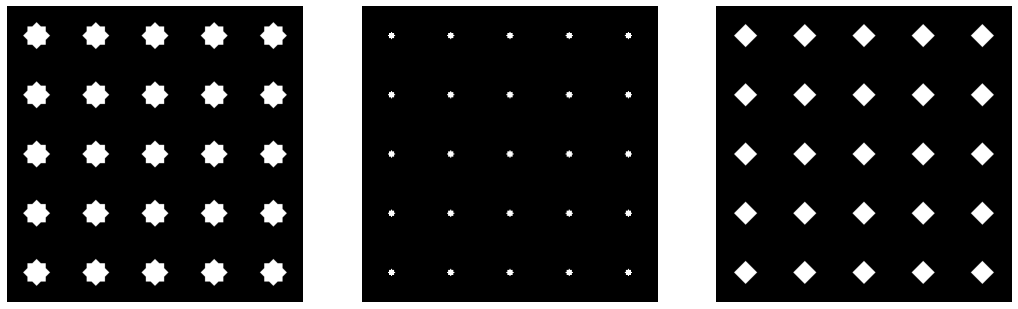

In [92]:
#create a few binary patterns
im_star = np.tile(pad(star(25), 45), (5, 5))
im_circle = np.tile(pad(disk(3),25), (5,5))
im_diamond = np.tile(pad(diamond(25),40), (5,5))

fig, axes = plt.subplots(ncols=3, figsize=(18,7))

for ax in axes:
    ax.axis('off')

axes[0].imshow(im_star, cmap='gray')
axes[1].imshow(im_circle, cmap='gray')
axes[2].imshow(im_diamond, cmap='gray')

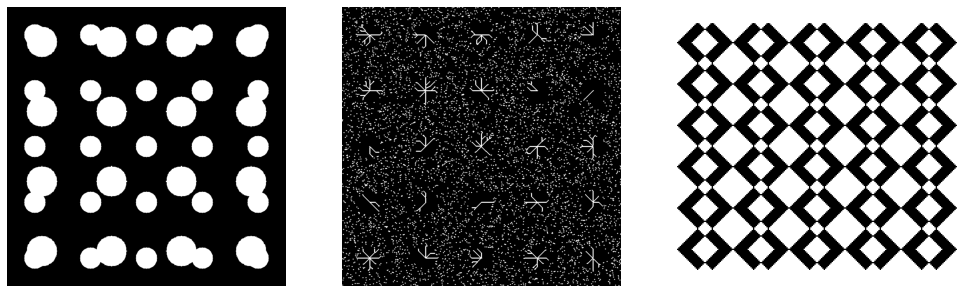

In [111]:
#create more advanced patterns

#This I made by playing around and just find super cool
im_circ1 = np.tile(pad(disk(25),40), (5,5))
im_circ2 = np.tile(pad(disk(30),40), (4,4))
im_circ2 = resize(im_circ2, (655,655))
im_rorschach = np.logical_or(im_circ1,im_circ2)


#Make a pattern of constellations!
noise = np.random.random(im_star.shape) > 0.99
noise = dilate(noise, disk(1))
im_constellation = im_star | noise

#Make just an interesting repeating pattern
elem1 = np.zeros((31, 42))
elem2 = np.zeros((31, 42))
elem1[:, 0:31] = diamond(15)
elem2[:, 11:] = diamond(15)
elem3 = 1 - np.logical_xor(elem1, elem2)
im_tiled = np.tile(elem3, (6,5))

#plot
fig, axes = plt.subplots(ncols=3, figsize=(17, 6))
for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im_rorschach, cmap='gray')
axes[1].imshow(dilate(thin(im_constellation), disk(1)), cmap='gray')
axes[2].imshow(im_tiled, cmap='gray')

# Problem 3

I have made 4 issues on your GitHub repos. Each team member should address one of the issues separately. Make sure that each team member makes their own commits to get credit for this problem. Use the Assignees functionality in Github to assign each issues to a team member. When closing the issue, include a detailed description of what was changed in order to address the issue. Consider adding in blocks of code to show exactly what was done. I will check:

1. The issue assignee
2. The commits of the issue assignee
3. The issue closing statement

In [5]:
#not required